In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Geometric Trasformation
*Spatial Transformation:* These are transformations that are related to positions or cordinates of different pixels.

Transformations can be categorized into two:
- Linear Transformation: A function
- Non-linear Transformation

Scaling using OpenCV

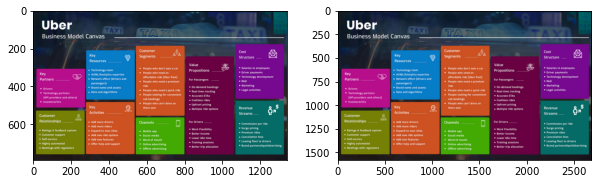

In [2]:
image = cv2.imread('images/business.jpg')
image_resized = cv2.resize(image, fx=2, fy=2, dsize=None)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(image)

plt.subplot(122)
plt.imshow(image_resized)

## Scaling as a matrix multiplication

Let's try to illustrate how scaling is applied on an image, like we said, scaling is a matrix multiplication

In [3]:
cordinate = np.array([2,4])
sx,sy = 2,2 # scaler point

scaler = np.array([[sx, 0], [0, sy]])
result = scaler.dot(cordinate) # Matrix multiplication
result

array([4, 8])

Our resultant cordinate becomes `[4,8]` after scaling, this means our cordinates have been shifted twice from point of origin `[2,4]`

### 3D scaling Excerise

In [4]:
cordinate = np.array([2,4,6])
sx, sy, sz = 3,0.5,2

scaler = np.array([[sx,0,0], [0,sy,0],[0,0,sz]])
result = scaler.dot(cordinate)
scaler, result

(array([[3. , 0. , 0. ],
        [0. , 0.5, 0. ],
        [0. , 0. , 2. ]]),
 array([ 6.,  2., 12.]))

### Image Copying and Flipping
One of the challenges associated with scaling are continous cordinates. All cordinates are expected to be discrete in order to scale.

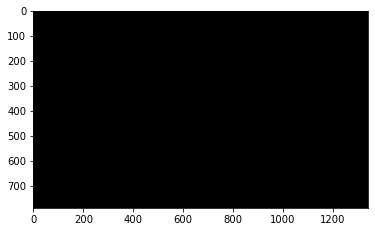

In [5]:
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
image2 = np.zeros((image.shape[0], image.shape[1]), dtype='uint8')
plt.imshow(image2, cmap='gray')

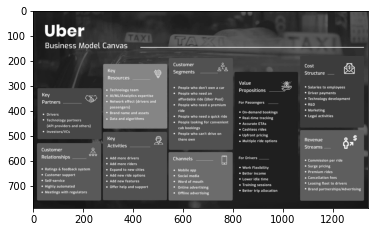

In [6]:
# Copying the image into our blank synthetic image

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image2[i,j] = image[i,j]
plt.imshow(image2, cmap='gray')

In [7]:
# Copying the image into our blank synthetic image and flipping it

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image2[image.shape[0]-i-1,j] = image[i,j]
plt.imshow(image2, cmap='gray')

Flipping can similarly be done like this below

In [ ]:
plt.imshow(image2[::-1, :])

## Excercise 
write a code to copy only half the row of the image

In [ ]:
image2 = np.zeros((int(image.shape[0]/2), image.shape[1]), dtype=np.uint8)
for i in range(image.shape[0]//2):
    for j in range(image.shape[1]):
        image2[i,j] = image[i,j]

plt.imshow(image2, cmap='gray')

Another way much faster and efficient to do solve this excersice is this

In [ ]:
image2 = image[:image.shape[0]//2, :]
plt.imshow(image2, cmap='gray')

## Saturation and holes

In [ ]:
new_image = np.zeros((2*image.shape[0], 2*image.shape[1]), dtype=np.uint8)
scaler = np.array([[2,0],[0,2]])

# Copy pixel intensities from from original image to new scaled image
for i in range(image.shape[0]):
    for j in range (image.shape[1]):
        cordinate = np.array([i,j])
        dot_scaler = scaler.dot(cordinate)
        new_i, new_j = dot_scaler
        new_image[new_i, new_j] = image[i,j]

In [ ]:
plt.imshow(new_image, cmap='gray')

Now, because our image isn't been displayed in it's actual size, let's create a function to help us visualize this image in its actual size

In [2]:
def display_image(image):
    dot_per_inch = mpl.rcParams['figure.dpi']
    height, width = image.shape[:2]
    fig = plt.figure(figsize=(height/int(dot_per_inch), width/int(dot_per_inch)))
    plt.imshow(image, cmap='gray')
    plt.show()
dpi = mpl.rcParams['figure.dpi']

In [ ]:
display_image(new_image)

In [ ]:
scaler = np.array([[2,0],[0,2]])
inverse_scale = np.linalg.inv(scaler)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        cordinate = np.array([i,j])
        dot_cord = inverse_scale.dot(cordinate)
        new_i, new_j = np.int16(np.round(dot_cord))
        if i < image.shape[0] or i >=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            new_image[i,j] = image[new_i, new_j]

In [ ]:
display_image(new_image)

## Algorithm for scaling an image
- Get an image
- setup the scale factors Sx and Sy
- Transform image extents to get the resultant image size
- Initialize the resultant image with all zeros or ones `(np.zeroes() or np.ones())`
- Computer the inverse transformation matrix
- Foreach pixel location `(a,b)` resultant image:
    - Apply inverse transformation on `(a,b)` an get `(c,d)` in the source image
    - Apply interpolation on `(c,d)` and get intensity `g`
    - Copy intensity `g` on location `(a,b)` in the resultant image

## Bilinear Interpolation Algorithm

In [4]:
def bilinear_interpolation(r,c,image):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr

    if tr>=0 and br < image.shape[0] and lc >=0 and rc < image.shape[1]:
        a = wl*image[tr,lc] + wr*image[tr,rc]
        b = wl*image[br,lc] + wr*image[br,rc]
        g = wt*a + wb*b
        return np.uint8(g)
    else:
        return 0

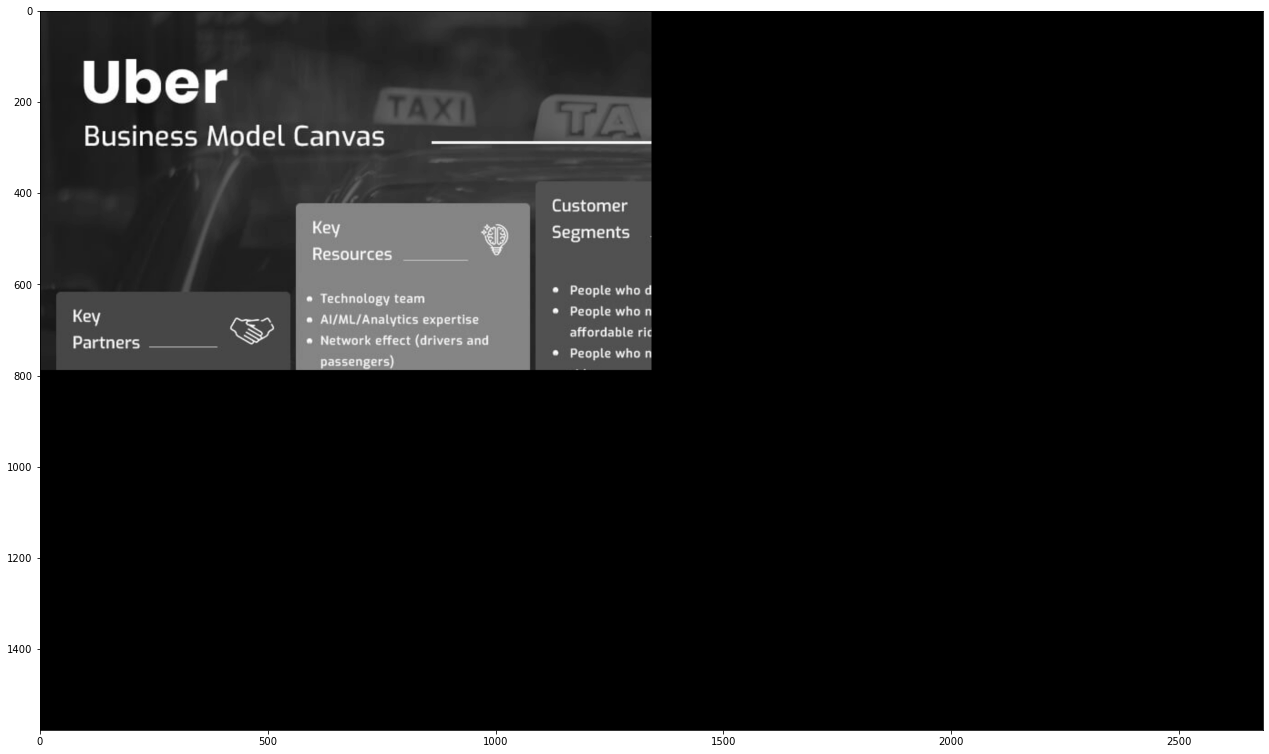

In [10]:
def bilinear_interpolation1(row, column, image):
    
    left_column = int(column)
    right_column = left_column +1
    weight_for_right_col = column - left_column
    weight_for_left_col = right_column - column
    
    top_row = int(row)
    bottom_row = top_row + 1
    weight_for_top_row = bottom_row - row
    weight_for_bottom_row = row - top_row
    
    # Check to see if we are within our image boundary
    if top_row >= 0 and bottom_row < image.shape[0] and left_column >= 0 and right_column<image.shape[1]:
        angle_a = weight_for_left_col * image[top_row, left_column] + weight_for_right_col * [top_row, right_column]
        angle_b = weight_for_left_col * image[bottom_row, left_column] + weight_for_right_col * [bottom_row, right_column]

        result = weight_for_top_row * angle_a + weight_for_bottom_row * angle_b
        return np.uint8(result)
    else:
        return 0

# Apply bilinear transformation to an image
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
empty_image = np.zeros((2*image.shape[0], 2*image.shape[1]), dtype=np.uint8)
scaler = np.array([[2,0], [0,2]])
inverse_scaler = np.linalg.inv(scaler)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        point = np.array([i,j])
        dot_point = inverse_scaler.dot(point)
        new_i, new_j = dot_point

        if i < 0 or i >=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            g = bilinear_interpolation(new_i,new_j, image)
            empty_image[i, j] = g

display_image(empty_image)

In [5]:
from config import BilinearInterpolation
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
bilinear = BilinearInterpolation(image, [2,2])
bilinear.core_transform() # for some weird reasons, this keeps returning a an error 🤦🏽‍♂️

array([[39., 39., 39., ...,  0.,  0.,  0.],
       [39., 39., 39., ...,  0.,  0.,  0.],
       [39., 39., 39., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Exercise
- Write a function in python to compute the resultant image size with respect to the given transformation
- Extend your code to handle colored

In [6]:
def get_scaling_matrix(scale):
    size = len(scale)
    matrix = np.zeros((size, size))
    for i, j in enumerate(matrix):
        matrix[i][i] = scale[i]
    return matrix

In [7]:
def scale_image(scale:list, image):
    empty_image = np.zeros((scale[0]*image.shape[0], scale[1]*image.shape[1]), dtype=np.uint8)
    scale = get_scaling_matrix(scale)
    inverse_scale = np.linalg.inv(scale)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            point = np.array([i,j])
            dot_point = inverse_scale.dot(point)
            new_i, new_j = dot_point
            if i < 0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
                pass
            else:
                empty_image[i,j] = bilinear_interpolation(new_i, new_j, image)

image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
scale_image([2,2], image)

TypeError: Image data of dtype object cannot be converted to float

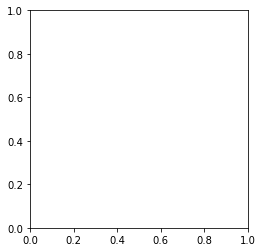

In [8]:
def transform_rgb(image):
    r = scale_image(image=image[:,:,0],scale=[2,2])
    g = scale_image(image=image[:,:,1],scale=[2,2])
    b = scale_image(image=image[:,:,2],scale=[2,2])

    new_image = r,g,b
    return plt.imshow(np.asarray(new_image))

image = np.array(plt.imread('images/business.jpg'), dtype='float')
transform_rgb(image=image)

### Rotation Algorithm
Rotation is a linear transformation
[r',c'] = [[cos∅, -sin∅],[sin∅, cos∅]][r,c] #Formular

Although it comes with some challenges while trying to achieve it like `Handling Index Shifting`

In [ ]:
from config import BilinearInterpolation
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
bilinear = BilinearInterpolation(image, [1,1])

#Define rotation in degrees and convert to radian for numpy 
angle = 45
cos = np.cos(np.deg2rad(angle))
sin = np.cos(np.deg2rad(angle))

scale = np.array([[cos, -sin],[sin, cos]])
row, col = image.shape[:2]
cordinate = np.array([[0,0],[0,col-1],[row-1,0],[row-1,col-1]])
dot_cord = scale.dot(cordinate.T)

minimums = dot_cord.min(axis=1)
maximums = dot_cord.max(axis=1)

min_row = np.int64(np.floor(minimums[0]))
min_col = np.int64(np.floor(minimums[1]))

max_row = np.int64(np.ceil(maximums[0]))
max_col = np.int64(np.ceil(maximums[1]))

row = max_row - min_row +1
col = max_col - min_col +1

# Create empty image 
empty_image = np.zeros((row, col), dtype=np.uint8)
scale_inverse = np.linalg.inv(scale) # Index shifting

for i in range(min_row, max_row):
    for j in range(min_col, max_col):
        point = np.array([i,j])
        dot_point = scale_inverse.dot(point)
        new_i, new_j = dot_point
        if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            bilinear_interpol = bilinear_interpolation(new_i, new_j, image)
            empty_image[i-min_row, j-min_col] = bilinear_interpol

display_image(empty_image)


### Wrap the whole rotation transformation in a function to be more generic

In [ ]:
def rotation_transform(image, angle=45):
    
    cos = np.cos(np.deg2rad(angle))
    sin = np.sin(np.deg2rad(angle))

    scale = np.array([[cos, -sin], [sin,cos]])
    row, col = image.shape[0], image.shape[1]
    cords = np.array([[0,0], [0, col-1],[row-1,0], [row-1, col-1]])

    dot_cord = scale.dot(cords.T)
    
    minimums = dot_cord.min(axis=1)
    maximums = dot_cord.max(axis=1)

    min_row = np.int64(np.floor(minimums[0]))
    min_col = np.int64(np.floor(minimums[1]))

    max_row = np.int64(np.ceil(maximums[0]))
    max_col = np.int64(np.ceil(maximums[1]))

    row = max_row - min_row +1
    col = max_col - min_col +1

    inverse_scale = np.linalg.inv(scale)
    empty_image = np.ones((row, col), dtype=np.uint8) * 255

    for i in range(min_row, max_row):
        for j in range(min_col, max_col):
            point = np.array([i,j])
            dot_point = inverse_scale.dot(point)
            new_i , new_j = dot_point

            if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
                pass
            else:
                bilinear_interpol = bilinear_interpolation(new_i, new_j, image)
                empty_image[i-min_row, j-min_col] = bilinear_interpol
    return empty_image

    

In [ ]:
display_image(rotation_transform(image))

### Reflection Algorithm using Nearest Neighbor interpolation

In [ ]:
scaler = np.array([[-1, 0],[0,1]])
empty_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
inverse_scale = np.linalg.inv(scaler) #Without inverting the scale it still works

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        point = np.array([i,j])
        dot_point = np.int16(np.round(inverse_scale.dot(point)))

        new_i, new_j = dot_point
        if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            empty_image[i, j] = image[new_i,new_j]

display_image(empty_image)

Reflection can also be done using openCV

In [ ]:
image = cv2.flip(image, 0)
display_image(image)

### Shear Transformation 
Shear transformatio in also a linear transformation because it's also achievable through matrix multiplication

In [ ]:
shear = 0.5
scale = np.array([[1,0],[shear, 1]])

def transform(scaler, image):
    empty_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    inverse_scale = np.linalg.inv(scaler)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            point = np.array([i,j])
            dot_point = np.int16(np.round(inverse_scale.dot(point)))

            new_i, new_j = dot_point
            if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
                pass
            else:
                empty_image[i, j] = image[new_i,new_j]
    display_image(empty_image)

transform(scale, image)

### Translation transformation algorithm

In [12]:
tr = 50
tc = 50
scaler = np.array([[1,0,tr], [0,1,tc],[0,0,1]])
empty_image = np.ones((image.shape[0],image.shape[1]), dtype=np.uint8)
inverse_scale = np.linalg.inv(scaler)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        point = np.array([i, j, 1])
        dot_point = np.int64(np.floor(inverse_scale.dot(point)))
        new_i, new_j, k = dot_point
        if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            empty_image[i,j] = image[new_i,new_j]
plt.imsave('Transformed-image.jpg',empty_image)
display_image(empty_image)

ValueError: setting an array element with a sequence.

### Exercise: Create a function to TRANSLATE and ROTATE an Image at the same time

In [9]:
def get_affine(translation,row, col):
 
    cord = np.array([[0,0,1], [0,col-1,1],[row-1, 0,1], [row-1,col-1,1]])
    scale = translation.dot(cord.T)
    scale = scale/scale[2,:]    

    mins = scale.min(axis=1)
    maxs = scale.max(axis=1)

    min_row = np.int64(mins[0])
    min_col = np.int64(mins[1])

    max_row = np.int64(maxs[0])
    max_col = np.int64(maxs[1])

    row = max_row - min_row + 1
    col = max_col - min_col + 1

    return min_row, min_col, max_row, max_col, row, col

### Exercise: Create a function to TRANSLATE and ROTATE an Image at the same time

In [10]:
def apply_all_transformationations(translation, image):
    """Applies scaling, shearing, rotation, reflection, and translation on an image
    
    Args:
        translation ndarray: Affine translation array
        image ndarray: numpy array of image
    """
    R,C = image.shape[0], image.shape[1]
    min_row, min_col, max_row, max_col, row, col = get_affine(translation=translation, row=R, col=C)
    empty_image = np.zeros((row, col), dtype='uint8')
    t_inverse = np.linalg.inv(translation)
    
    #Start Copying the image
    for i in range(min_row, max_row):
        for j in range(min_col, max_col):
            point = np.array([i,j,1])
            dot_point = t_inverse.dot(point)
            dot_point = dot_point/dot_point[2]
            new_i , new_j = dot_point[:2]
            
            # Check if we are within image boundary 
            if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
                pass
            else:
                empty_image[i-min_row, j-min_col] = bilinear_interpolation(new_i, new_j, image)
    return empty_image

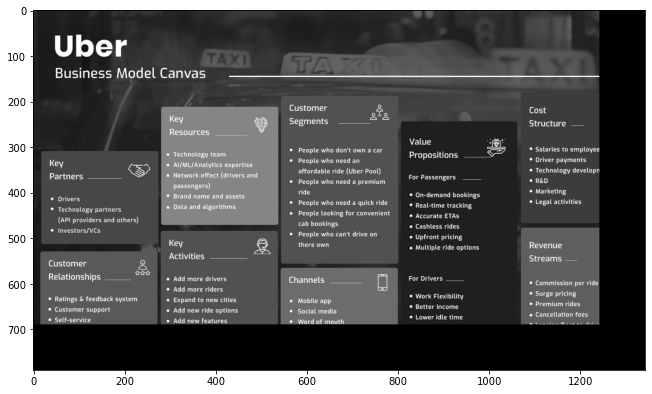

In [122]:
T = np.array([[1,0,100], [0,1,100],[0,0,1]])
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)

display_image(apply_all_transformationations(T, image))

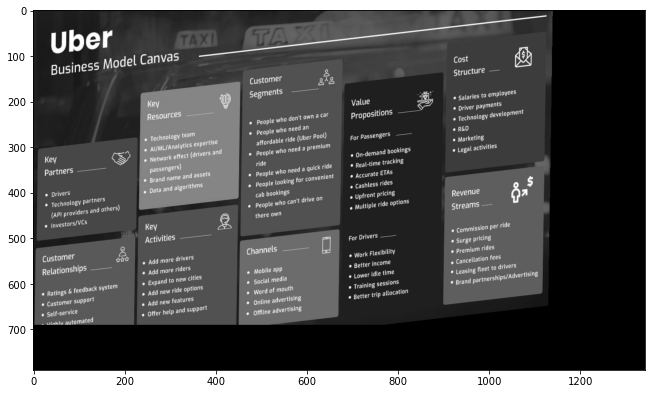

In [160]:
angle = 45
cos = np.cos(np.deg2rad(angle))
sin = np.cos(np.deg2rad(angle))

shear = np.array([[0,1,1],[0,1,1],[0,0,1]])
reflection = np.array([[1,0,1], [0,1,1],[0,0,1]])
translation = np.array([[1,0,100], [0,1,150],[0,0,1]])
scaling = np.array([[2, 1,1],[2,0,1],[0,0,1]])

scale = np.linalg.inv(reflection).dot(translation)
scale[2,:] = np.array([0.0001,0.001,1])
scale
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
plt.imsave('Transformed-image.jpg', apply_all_transformationations(scale, image))
display_image(apply_all_transformationations(scale, image))

## Estimation Point Marking using Python

### Exercise: 
Given 2 Images one original and the other transformed (using AFFINE TRANSFOMATION) can you find the parameters used in transforming the transformed image?

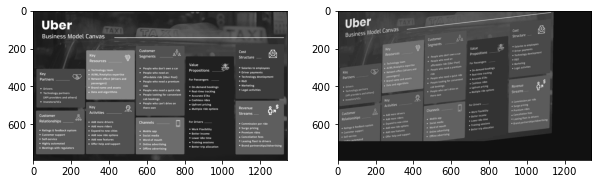

In [161]:
original_image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
transformed_image = cv2.imread('Transformed-image.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(original_image, cmap='gray')

plt.subplot(122)
plt.imshow(transformed_image, cmap='gray')

In [11]:
def get_points(image, number_of_points):
    %matplotlib
    fig, ax = plt.subplots(1, figsize=(10,7))
    plt.imshow(image)
    pts = np.round(plt.ginput(n=number_of_points))
    print(pts)
    pts = pts[:,[1,0]].T
    plt.close()
    return pts

In [163]:
pts = get_points(original_image, 3)
pts

Using matplotlib backend: MacOSX
[[ 67.  96.]
 [113.  94.]
 [153.  95.]]


array([[ 96.,  94.,  95.],
       [ 67., 113., 153.]])

In [164]:
pts1 = np.vstack((pts,np.ones((1,3))))
# pts1[2,:] =
pts1

array([[ 96.,  94.,  95.],
       [ 67., 113., 153.],
       [  1.,   1.,   1.]])

In [165]:
pts2 = get_points(transformed_image, 3)
pts2

Using matplotlib backend: MacOSX
[[ 56.  90.]
 [ 96.  84.]
 [132.  82.]]


array([[ 90.,  84.,  82.],
       [ 56.,  96., 132.]])

In [166]:
# pts2[:,0] = pts2[:,0] - transformed_image.shape[0]/2
pts2 = np.vstack((pts2, np.ones((1,3))))
pts2

array([[ 90.,  84.,  82.],
       [ 56.,  96., 132.],
       [  1.,   1.,   1.]])

In [177]:
estimate = pts2.dot(np.linalg.inv(pts1))
estimate

array([[ 1.17460317e+00, -7.93650794e-02, -1.74444444e+01],
       [ 4.44444444e-01,  8.88888889e-01, -4.62222222e+01],
       [ 5.55111512e-17,  0.00000000e+00,  1.00000000e+00]])

In [178]:
%matplotlib inline

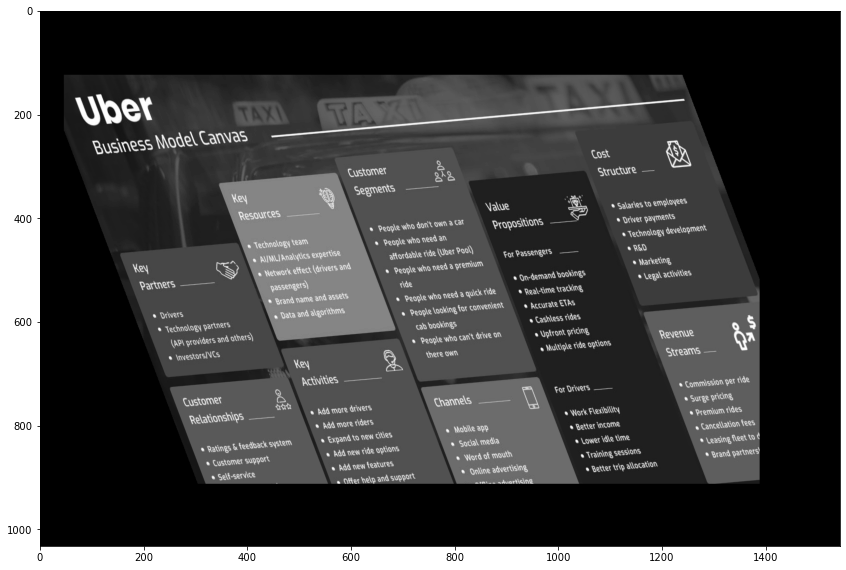

In [179]:
display_image(apply_all_transformationations(estimate,original_image))

### AFFINE TRANSFORMATION ESTIMATION ACROSS N-POINTS

In [92]:
point1 = get_points(original_image, 5)
point1 = np.vstack((point1, np.ones((1,5))))
point1

Using matplotlib backend: MacOSX
[[ 62.  89.]
 [106.  90.]
 [160.  97.]
 [190.  89.]
 [ 60. 140.]]


array([[ 89.,  90.,  97.,  89., 140.],
       [ 62., 106., 160., 190.,  60.],
       [  1.,   1.,   1.,   1.,   1.]])

In [93]:
point2 = get_points(transformed_image, 5)
point2 = np.vstack((point2, np.ones((1,5))))
point2

Using matplotlib backend: MacOSX
[[ 60. 135.]
 [ 94. 130.]
 [126. 124.]
 [143. 123.]
 [ 54. 181.]]


array([[135., 130., 124., 123., 181.],
       [ 60.,  94., 126., 143.,  54.],
       [  1.,   1.,   1.,   1.,   1.]])

In [118]:
estimate = point2.dot(point1.T).dot(np.linalg.inv(point1.dot(point1.T)))
estimate

array([[ 8.88394900e-01, -1.23768484e-01,  6.31797518e+01],
       [-1.30989421e-01,  6.47829151e-01,  3.37408817e+01],
       [ 4.16333634e-17,  1.38777878e-17,  1.00000000e+00]])

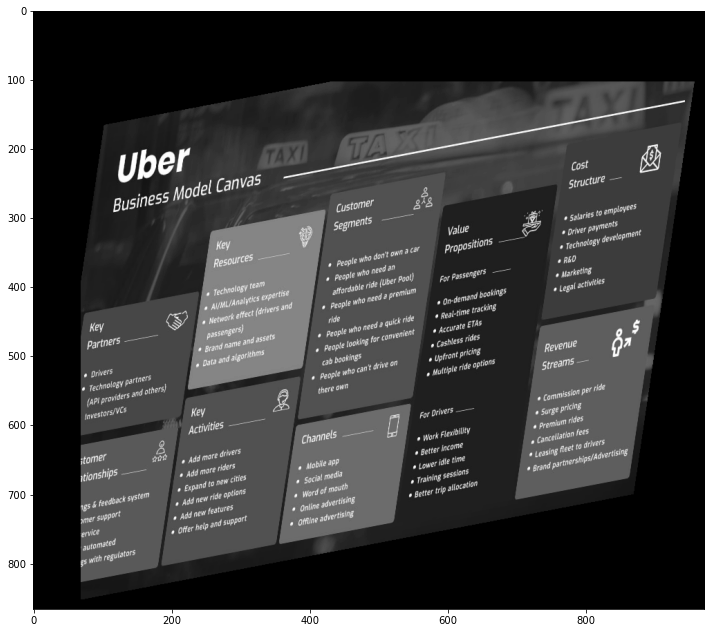

In [119]:
%matplotlib inline
display_image(apply_all_transformationations(estimate,original_image))

### Projective Transformation Estimation (DLT) Nullspace Implementation

To find the eigenvalues of a matrix, calculate the roots of its characteristic polynomial. 
<br> The roots of P are found by the calculation P(M)=0⟺x=−1 or x=5 P ( M ) = 0 ⟺ x = − 1 or x = 5 . 
<br>The eigenvalues of the matrix M are −1 and 5 .

In [12]:
def computeRightNullSpace(A):
    B = A.T.dot(A)
    w,v = np.linalg.eig(B)
    idx = np.argmax(w)
    return v[:,idx]

In [195]:
computeRightNullSpace(estimate)

array([-0.01680368, -0.01625332,  0.9997267 ])

array([[-0.01680368, -0.92455652,  0.38067424],
       [-0.01625332,  0.38093027,  0.9244609 ],
       [ 0.9997267 , -0.00934712,  0.02142815]])

## PANORAMA Stitching with OpenCV
So, because we don't have a split image for panorama stitching, we will create our own and stitch it back

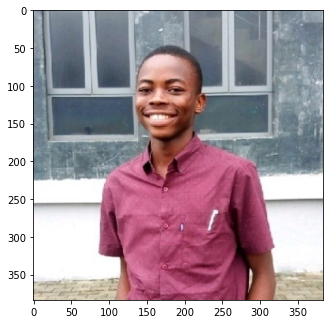

In [13]:
# First create a folder where the images will be stored
import os
if not ('panoramas') in os.listdir():
    os.mkdir('panoramas')

# Import our image for creating splitting
img = cv2.imread('images/me.jpg')
# Convert img to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_image(img)

In [14]:
# Create our images
plt.imsave('panoramas/img1.jpg', img[:,:160,:])
plt.imsave('panoramas/img2.jpg', img[:,128:300,:])
plt.imsave('panoramas/img3.jpg', img[:,170:,:])

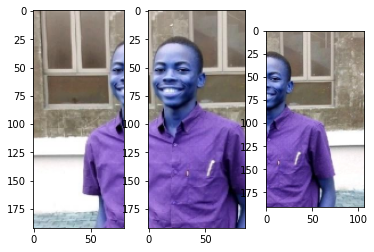

In [15]:
# Read our synthetic image
img1 = cv2.imread('panoramas/img1.jpg')
img2 = cv2.imread('panoramas/img2.jpg')
img3 = cv2.imread('panoramas/img3.jpg')

img1 = cv2.resize(img1,fx=0.5, fy=0.5, dsize=(0,0))
img2 = cv2.resize(img2,fx=0.5, fy=0.5, dsize=(0,0))
img3 = cv2.resize(img3,fx=0.5, fy=0.5, dsize=(0,0))

# Initialize our stitcher object
stitcher = cv2.Stitcher_create(cv2.Stitcher_SCANS)
stitcher.setPanoConfidenceThresh(0.0)
status, panorama = stitcher.stitch((img1[:,:,::-1],img2[:,:,::-1],img3[:,:,::-1]))

# Visualize our panorama
plt.subplot(131)
plt.imshow(img1)

plt.subplot(132)
plt.imshow(img2)

plt.subplot(133)
plt.imshow(img3)

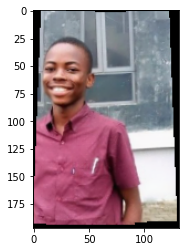

In [16]:
assert status == 0
plt.imshow(panorama)

### Binary Images

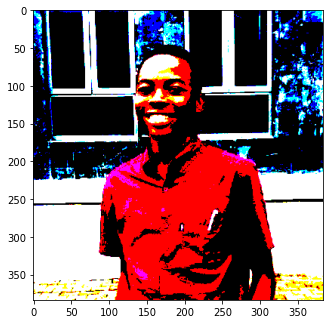

In [17]:
threshold = 160
imgg = img>threshold
imgg = np.array(imgg, dtype='float32')
display_image(imgg)

### Structuring Elements in OpenCV
A structuring element is a matrix of some abitrary shape consisting of only 0's and 1's they define the area used in processing pixels in an image

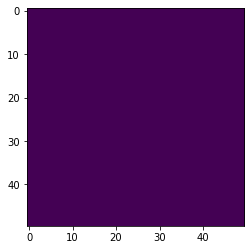

In [18]:
rect_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (50,50))
plt.imshow(rect_structure)

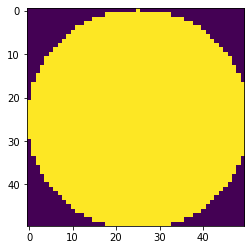

In [19]:
elipse_structure = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50))
plt.imshow(elipse_structure)

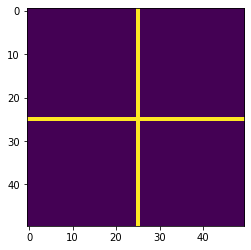

In [20]:
dilate_structure = cv2.getStructuringElement(cv2.MORPH_DILATE,(50,50))
plt.imshow(dilate_structure)

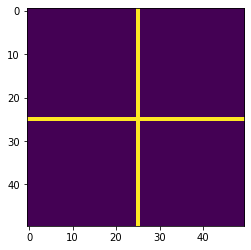

In [21]:
cross_structure = cv2.getStructuringElement(cv2.MORPH_CROSS,(50,50))
plt.imshow(cross_structure)

### Erosion and Dilation

Text(0.5, 1.0, 'Ellipse Errosion')

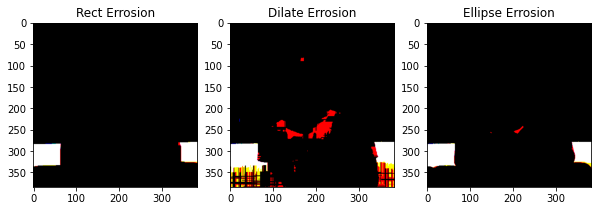

In [22]:
rect_err = cv2.erode(imgg, rect_structure)
dilate_err = cv2.erode(imgg, dilate_structure)
ellipse_err = cv2.erode(imgg, elipse_structure)

plt.figure(figsize=(10,7))
plt.subplot(131)
plt.imshow(rect_err)
plt.title('Rect Errosion')

plt.subplot(132)
plt.imshow(dilate_err)
plt.title('Dilate Errosion')

plt.subplot(133)
plt.imshow(ellipse_err)
plt.title('Ellipse Errosion')

#### Dilate

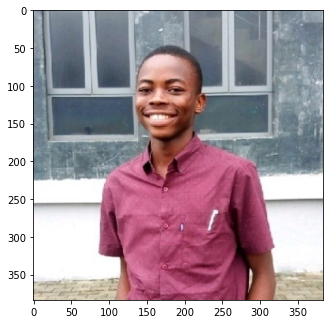

In [3]:
img = cv2.imread('images/me.jpg')
display_image(img[:,:,::-1])

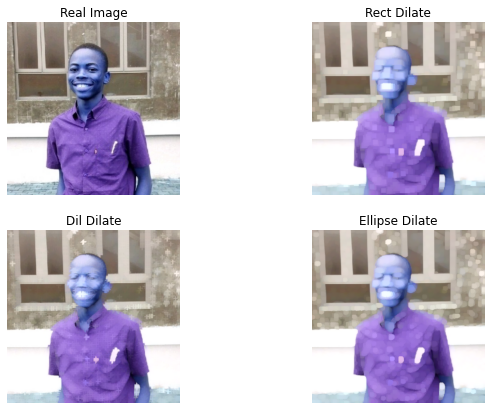

In [4]:
rect_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
dilate_structure = cv2.getStructuringElement(cv2.MORPH_DILATE, (10,10))
elipse_structure = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))

rect_dilate = cv2.dilate(img,rect_structure)
dil_dilate = cv2.dilate(img, dilate_structure)
ell_dilate = cv2.dilate(img, elipse_structure)

plt.figure(figsize=(10,7))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Real Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(rect_dilate, cmap='gray')
plt.title('Rect Dilate')
plt.axis('off')

plt.subplot(223)
plt.imshow(dil_dilate, cmap='gray')
plt.title('Dil Dilate')
plt.axis('off')

plt.subplot(224)
plt.imshow(ell_dilate, cmap='gray')
plt.title('Ellipse Dilate')
plt.axis('off')

plt.show()



### Image Opening
This is the process/technique of combining Erosion and Dilation in same image. Here you perform Erosion first followed by Dilation in other to remove noise

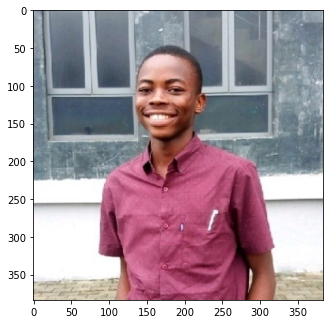

In [5]:
display_image(img[:,:,::-1])

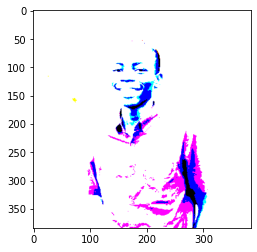

In [8]:
# Create a function to convert images to boolean
def binary_image(image, threshold):
    img = image >threshold
    img = np.asfarray(img)
    plt.imshow(img, cmap='gray')
    return img
binary_img = binary_image(img, 50)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

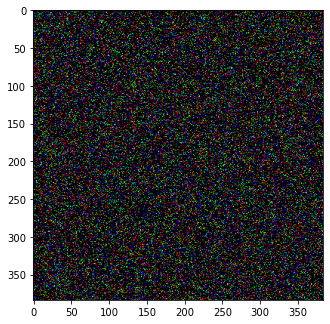

In [48]:
noise = np.random.rand(*img.shape) > 0.9
display_image(np.asfarray(noise))

(384, 384, 3)


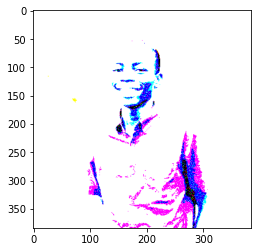

In [49]:
# Let's add this noise to our real image
new_img = np.array(noise, dtype="bool") | np.array(binary_img, dtype="bool")
print(new_img.shape)
plt.imshow(np.asfarray(new_img), cmap='gray')

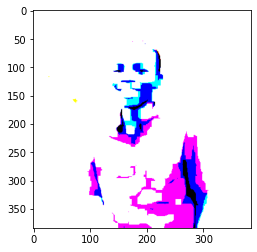

In [50]:
# Apply image opening
opening_img = cv2.morphologyEx(np.float64(new_img), cv2.MORPH_OPEN, rect_structure)
plt.imshow(opening_img)

#### Image Closing
This is a the opposite of `Image Opening`, here you perform Dilation first before Erosion

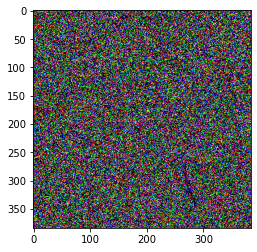

In [81]:
noise = np.random.rand(*img.shape)

#convert noise dtype to bool
noise = np.bool8(noise > 0.7)
new_image = np.bool8(img)

# combine images
new_image = noise & new_image

plt.imshow(np.asfarray(new_image), cmap='gray')

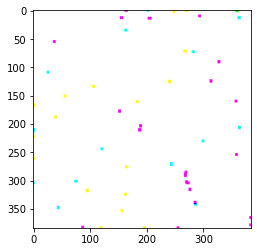

In [82]:
# Apply image closing
rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
image_closed = cv2.morphologyEx(np.float64(new_image),cv2.MORPH_CLOSE, rect)
plt.imshow(image_closed)

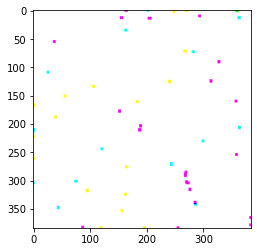

In [92]:
dilate = cv2.dilate(np.asfarray(new_image), rect)
erode = cv2.erode(np.asfarray(dilate), rect)
plt.imshow(erode)